In [1]:
import numpy as np
from scipy.optimize import curve_fit
from tqdm import tqdm
import os
import re
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 100,
})
from FVSimulation_phase_density.Finite_volume_method_1D import *

In [2]:
chippath = '../DataKian/bTa_LT278W2chip5/'
lambdanm = 402
filename = 'KID5_103dBm__TmK20_avgpulse_ampphase.csv'
length = 90

KID = KID_data(chippath,lambdanm,filename,length)

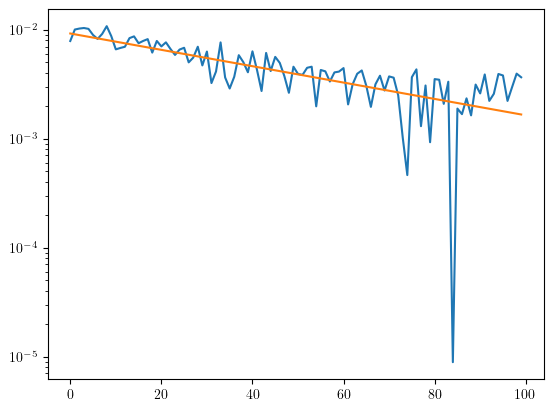

In [3]:
KID.fit_tail(start=150,end=250)

100%|██████████| 2000/2000 [00:03<00:00, 573.77it/s]


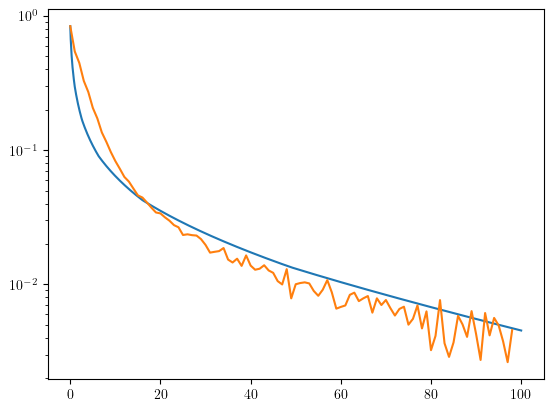

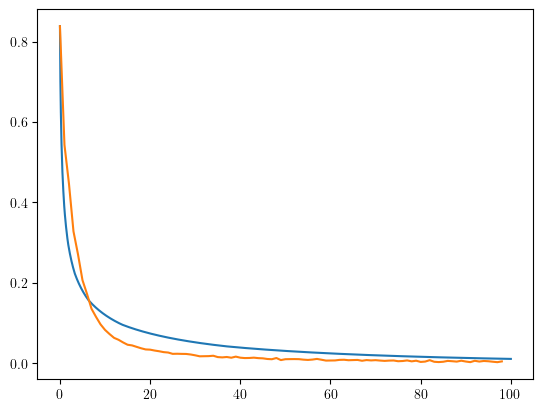

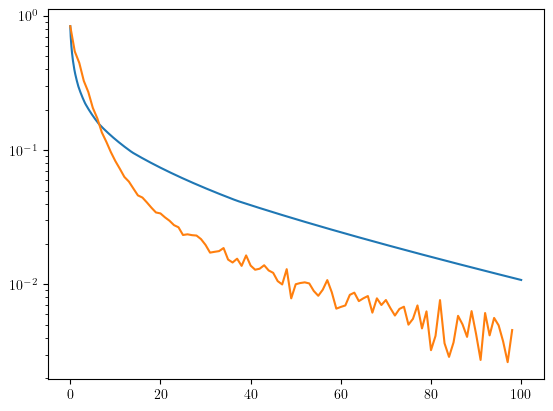

[D,K] =				 [ 80.         120.62048717]
Std dev of [D,K] =		 [52.88594152 28.5305605 ]
Correlation between parameters = 0.9610408608902558


In [32]:
offset = 1
simtime = 100
indmin = 100 + offset
indmax = 100 + simtime-1 + offset
fitdatax = KID.t_full[indmin:indmax]-indmin
fitdatay = KID.phase[indmin:indmax]

SIM = KID_sim(KID,50,200,0.1,1/4,sigma_IC=10,start_offset=offset,simtime_approx=simtime)

plt.plot(SIM.t_axis,SIM.timeseriestheta)
plt.semilogy(fitdatax,fitdatay)

def fitfunc(t,D,K): # probeer combinaties D,K en K,L
    SIM = KID_sim(KID,D,K,0.1,1/4,start_offset=offset,simtime_approx=simtime)
    return np.interp(t,SIM.t_axis,SIM.timeseriestheta)
popt,pcov=curve_fit(fitfunc,fitdatax,fitdatay,p0=[10,200],bounds=[0,[80,1000]])
SIM = KID_sim(KID,popt[0],popt[1],0.05,1/4,start_offset=offset,simtime_approx=simtime)
plt.figure()
plt.plot(SIM.t_axis,SIM.timeseriestheta)
plt.plot(fitdatax,fitdatay)
plt.show()
plt.figure()
plt.semilogy(SIM.t_axis,SIM.timeseriestheta)
plt.semilogy(fitdatax,fitdatay)
plt.show()
print('[D,K] =\t\t\t\t',popt)
stddevs = np.sqrt(np.diag(pcov))
corrcoeffs = (pcov/np.prod(stddevs))[0,1]
print('Std dev of [D,K] =\t\t',stddevs)
print('Correlation between parameters =',corrcoeffs)

100%|██████████| 1000/1000 [00:22<00:00, 44.09it/s]


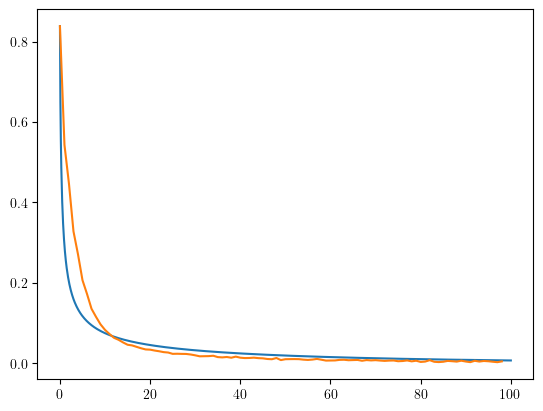

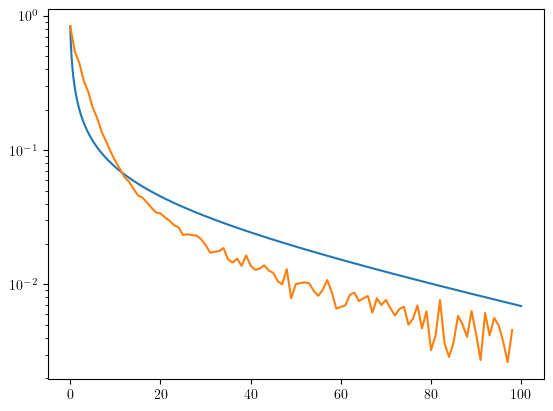

[D,K] =				 [ 0.148393   12.74252835]
Std dev of [D,K] =		 [0.00588646 0.81626196]
Correlation between parameters = -0.8438128545905043


In [33]:
def fitfunc(t,L,K): # probeer combinaties D,K en K,L
    SIM = KID_sim(KID,10,K,0.1,1/4,L=L,start_offset=offset,simtime_approx=simtime)
    return np.interp(t,SIM.t_axis,SIM.timeseriestheta)
popt,pcov=curve_fit(fitfunc,fitdatax,fitdatay,p0=[0.1,200],bounds=[0,1000])
SIM = KID_sim(KID,popt[0],popt[1],0.1,1/4,start_offset=offset,simtime_approx=simtime)
plt.figure()
plt.plot(SIM.t_axis,SIM.timeseriestheta)
plt.plot(fitdatax,fitdatay)
plt.show()
plt.figure()
plt.semilogy(SIM.t_axis,SIM.timeseriestheta)
plt.semilogy(fitdatax,fitdatay)
plt.show()
print('[D,K] =\t\t\t\t',popt)
stddevs = np.sqrt(np.diag(pcov))
corrcoeffs = (pcov/np.prod(stddevs))[0,1]
print('Std dev of [D,K] =\t\t',stddevs)
print('Correlation between parameters =',corrcoeffs)